Documentation: https://networkx.org/

In [ ]:
!pip install networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.Graph()

In [3]:
G.nodes

NodeView(())

In [33]:
# Visualisation helper function
def view_graph(G):
    import warnings
    warnings.filterwarnings("ignore")
    # Print nodes and edges     
#     print(f'Nodes in graph: {G.nodes}')
#     print(f'Edges in graph: {G.edges}')
    # Create a visualisation using NetworkX and draw using matplotlib
    pos = nx.spring_layout(G)
    # Extract node attributes and display them as labels
    if len(nx.get_node_attributes(G, 'population')) != 0:
        labels = {key: key + ':' + str(value) for (key, value) in nx.get_node_attributes(G, 'population').items()}
        nx.draw(G, pos=pos, with_labels=True, labels=labels)
    else:
        nx.draw(G, pos=pos, with_labels=True)
    # Extract edge attributes and display them as labels    
    if len(nx.get_edge_attributes(G,'distance')) != 0:
        edge_labels = nx.get_edge_attributes(G, 'distance')
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels = edge_labels)
    plt.figure(figsize=(12,12)) 
    plt.show()

### Add Nodes

Nodes in graph: [1]
Edges in graph: []


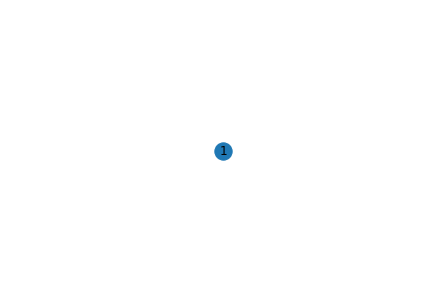

<Figure size 864x864 with 0 Axes>

In [6]:
G.add_node(1)
view_graph(G)

### Add More Nodes

Nodes in graph: [1, 2, 3]
Edges in graph: []


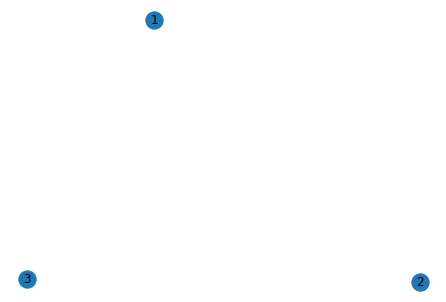

<Figure size 864x864 with 0 Axes>

In [7]:
G.add_nodes_from([2, 3])
view_graph(G)

### Add Connection: Edge

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2)]


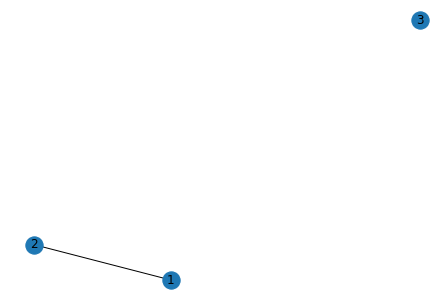

<Figure size 864x864 with 0 Axes>

In [8]:
G.add_edge(1, 2)
view_graph(G)

### Connect More Nodes

Nodes in graph: [1, 2, 3]
Edges in graph: [(1, 2), (1, 3), (2, 3)]


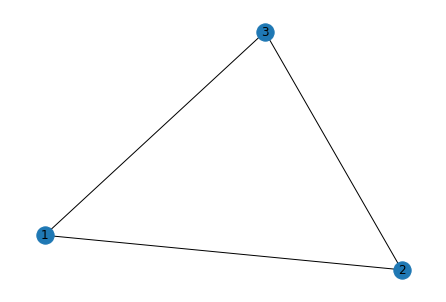

<Figure size 864x864 with 0 Axes>

In [9]:
G.add_edges_from([(1, 3), (2, 3)])
view_graph(G)

### Example 1: Friendship Network

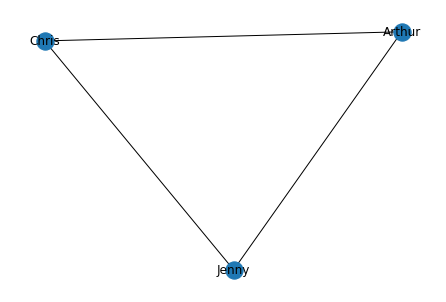

<Figure size 864x864 with 0 Axes>

In [15]:
friends = nx.Graph([('Arthur', 'Jenny'), ('Jenny', 'Chris'), ('Chris', 'Arthur')])
view_graph(friends)

### Check Friends of Arthur

In [16]:
list(friends.neighbors("Arthur"))

['Jenny', 'Chris']

### Removing Node

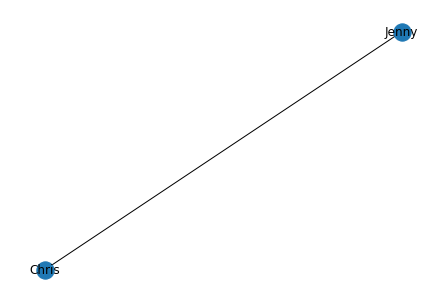

<Figure size 864x864 with 0 Axes>

In [17]:
friends.remove_node('Arthur')
view_graph(friends)

### Removing Edge

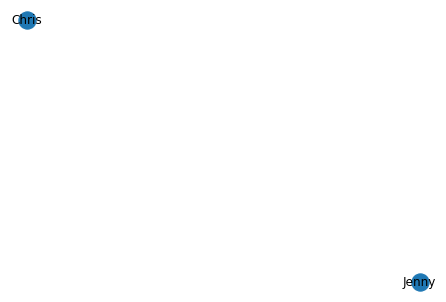

<Figure size 864x864 with 0 Axes>

In [18]:
friends.remove_edge('Chris',  'Jenny')
view_graph(friends)

In [19]:
help(friends)

Help on Graph in module networkx.classes.graph object:

class Graph(builtins.object)
 |  Graph(incoming_graph_data=None, **attr)
 |  
 |  Base class for undirected graphs.
 |  
 |  A Graph stores nodes and edges with optional data, or attributes.
 |  
 |  Graphs hold undirected edges.  Self loops are allowed but multiple
 |  (parallel) edges are not.
 |  
 |  Nodes can be arbitrary (hashable) Python objects with optional
 |  key/value attributes, except that `None` is not allowed as a node.
 |  
 |  Edges are represented as links between nodes with optional
 |  key/value attributes.
 |  
 |  Parameters
 |  ----------
 |  incoming_graph_data : input graph (optional, default: None)
 |      Data to initialize graph. If None (default) an empty
 |      graph is created.  The data can be any format that is supported
 |      by the to_networkx_graph() function, currently including edge list,
 |      dict of dicts, dict of lists, NetworkX graph, 2D NumPy array, SciPy
 |      sparse matrix, or 

### Directed Graphs

a graph in which the edges have a direction

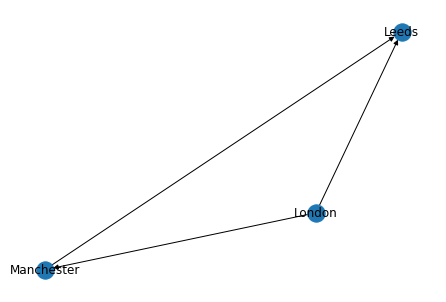

<Figure size 864x864 with 0 Axes>

In [20]:
uk_places = nx.DiGraph([('London', 'Manchester'), ('Manchester', 'Leeds'), ('London', 'Leeds')])
view_graph(uk_places)

### Parent and Child Concept

In [21]:
print(list(uk_places.successors('London')))
print(list(uk_places.predecessors('London')))

['Manchester', 'Leeds']
[]


### Subgraph: fraction of graph

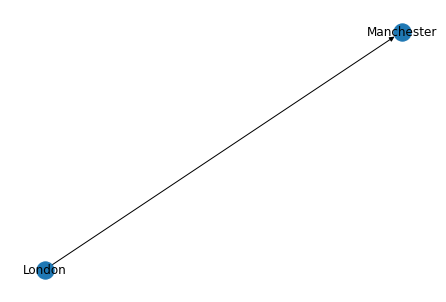

<Figure size 864x864 with 0 Axes>

In [22]:
subgraph = uk_places.subgraph(['London', 'Manchester'])
view_graph(subgraph)

### Exercise 1:

* Create Graph for the following places:
  Northampton - Leicester - Loughborough

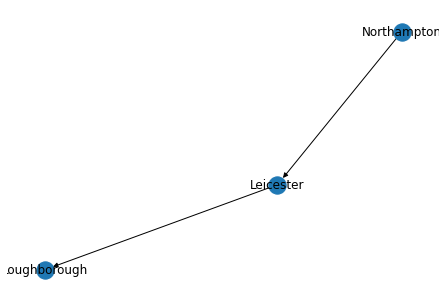

<Figure size 864x864 with 0 Axes>

In [23]:
uk_places_new = nx.DiGraph([('Northampton', 'Leicester'), ('Leicester', 'Loughborough')])
view_graph(uk_places_new)

### Combining Graphs

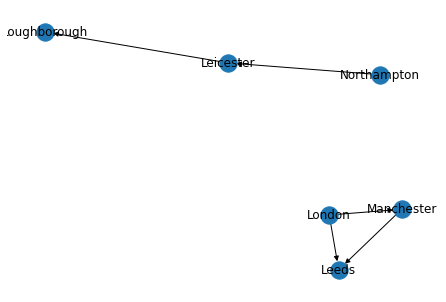

<Figure size 864x864 with 0 Axes>

In [24]:
combined_places = nx.union(uk_places, uk_places_new)
view_graph(combined_places)

### Intersection

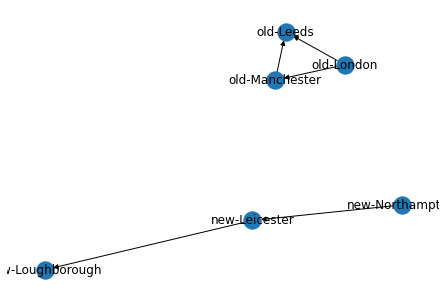

<Figure size 864x864 with 0 Axes>

In [25]:
uk_places_to_intersect = nx.DiGraph([('London', 'Manchester'), 
                                     ('Leeds', 'London'), 
                                     ('Leeds', 'Manchester')])
combined = nx.union(uk_places, uk_places_new, rename=('old-', 'new-'))
view_graph(combined)

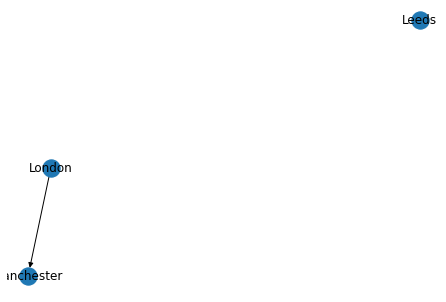

<Figure size 864x864 with 0 Axes>

In [27]:
intersected = nx.intersection(uk_places, uk_places_to_intersect)
view_graph(intersected)

In [ ]:
view_graph(uk_places)

### Getting Number of Connections

In [28]:
uk_places.degree

DiDegreeView({'London': 2, 'Manchester': 2, 'Leeds': 2})

In [29]:
print('In: ' + str(uk_places.in_degree))
print('Out: ' + str(uk_places.out_degree))

In: [('London', 0), ('Manchester', 1), ('Leeds', 2)]
Out: [('London', 2), ('Manchester', 1), ('Leeds', 0)]


In [30]:
uk_places.out_degree(['Manchester', 'Leeds'])

OutDegreeView({'Manchester': 1, 'Leeds': 0})

### Adding Node Attributes

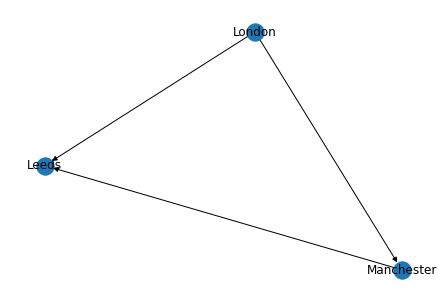

<Figure size 864x864 with 0 Axes>

In [31]:
view_graph(uk_places)

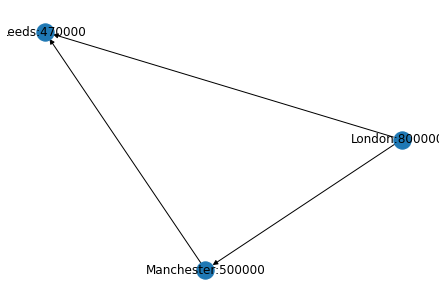

<Figure size 864x864 with 0 Axes>

In [34]:
uk_places.nodes['London']['population'] = 8000000
uk_places.nodes['Manchester']['population'] = 500000
uk_places.nodes['Leeds']['population'] = 470000
view_graph(uk_places)

### Adding Edge Attributes

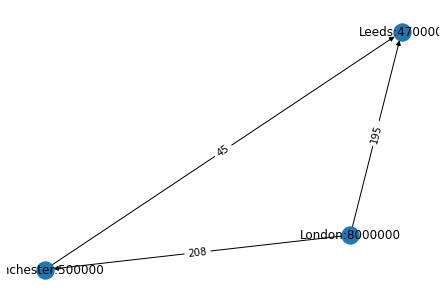

<Figure size 864x864 with 0 Axes>

In [35]:
uk_places.edges['London', 'Leeds']['distance'] = 195
uk_places.edges['London', 'Manchester']['distance'] = 208
uk_places.edges['Manchester', 'Leeds']['distance'] = 45
view_graph(uk_places)

### Another Way to Add Attributes

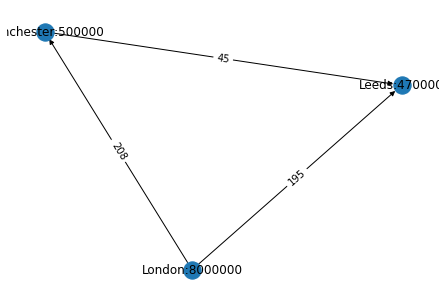

<Figure size 864x864 with 0 Axes>

In [36]:
node_attributes = {'London': {'population': 8000000},
                  'Manchester': {'population': 500000},
                  'Leeds': {'population': 470000}
                  }

nx.set_node_attributes(uk_places, node_attributes)

view_graph(uk_places)

In [37]:
edge_attributes = {('London', 'Leeds'): {'distance': 195},
         ('London', 'Manchester'): {'distance': 208},
         ('Manchester', 'Leeds'): {'distance': 45},
        }

nx.set_edge_attributes(uk_places, edge_attributes)

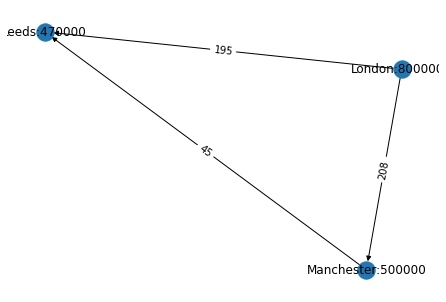

<Figure size 864x864 with 0 Axes>

In [38]:
view_graph(uk_places)

### Saving the network using adjlist

In [39]:
nx.write_adjlist(uk_places, 'cities.adjlist')

### Reading existing network

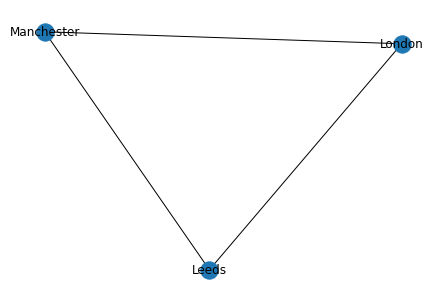

<Figure size 864x864 with 0 Axes>

In [40]:
uk_places_adjlist = nx.read_adjlist('cities.adjlist')
view_graph(uk_places_adjlist)

### Saving the network using gml

In [45]:
nx.write_gml(uk_places, 'cities.gml')

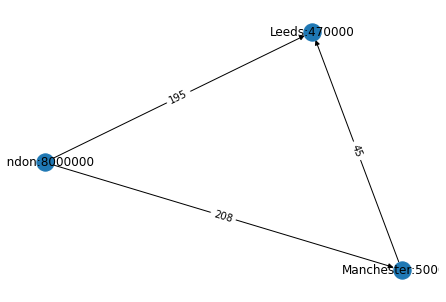

<Figure size 864x864 with 0 Axes>

In [46]:
uk_places_gml = nx.read_gml('cities.gml')
view_graph(uk_places_gml)

### Saving the network using graphml

In [43]:
nx.write_graphml(uk_places, 'cities.graphml')

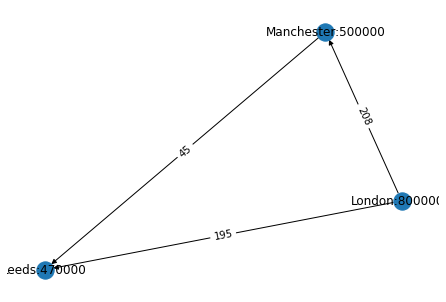

<Figure size 864x864 with 0 Axes>

In [44]:
uk_places_graphml = nx.read_graphml('cities.graphml')
view_graph(uk_places_graphml)

### Make a network from pandas df

In [47]:
import pandas as pd

data = pd.read_csv('marvel.csv')

In [48]:
data.head()

,Source,Target,Weight
0,Black Panther / T'chal,Loki [asgardian],10
1,Black Panther / T'chal,Mantis / ? Brandt,23
2,Black Panther / T'chal,Iceman / Robert Bobby,12
3,Black Panther / T'chal,Marvel Girl / Jean Grey,10
4,Black Panther / T'chal,Cyclops / Scott Summer,14


In [49]:
data.shape

(9891, 3)

In [50]:
G = nx.Graph()
G = nx.from_pandas_edgelist(data.head(20), "Source", "Target")

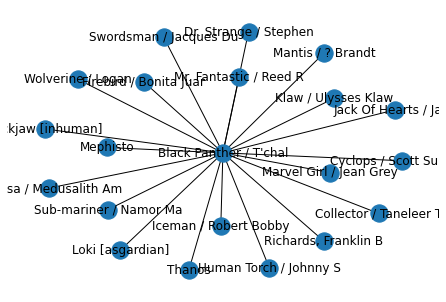

In [51]:
nx.draw(G, with_labels=True)

In [52]:
G = nx.from_pandas_edgelist(data.head(20), "Source", "Target", "Weight")

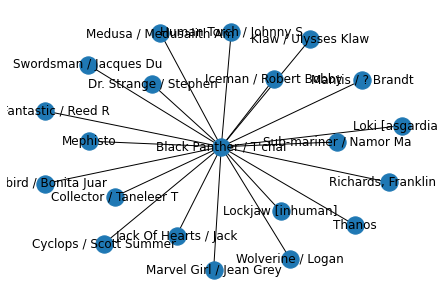

In [53]:
nx.draw(G, with_labels=True)

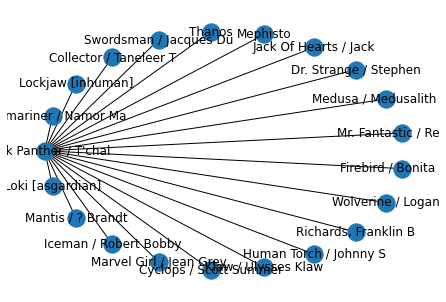

In [54]:
nx.draw_shell(G, with_labels=True)